# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID :</u> advaitchavan135@gmail.com
# CDAC PGDAI MACHINE LEARNING ASSIGNMENT__3

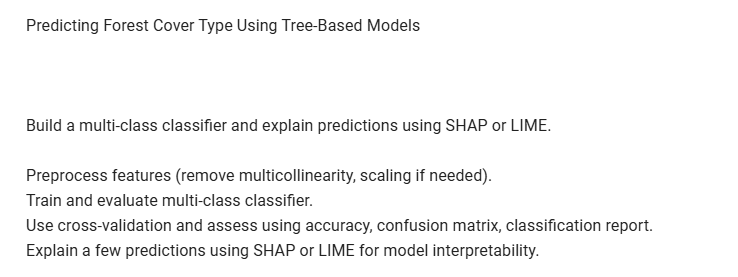

# 1. Reading the data

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 

In [2]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Cover_Type  581012 non-null  int64
dtypes: int64(1)
memory usage: 4.4 MB


# 2. Handling Multicollinearity and Scaling

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

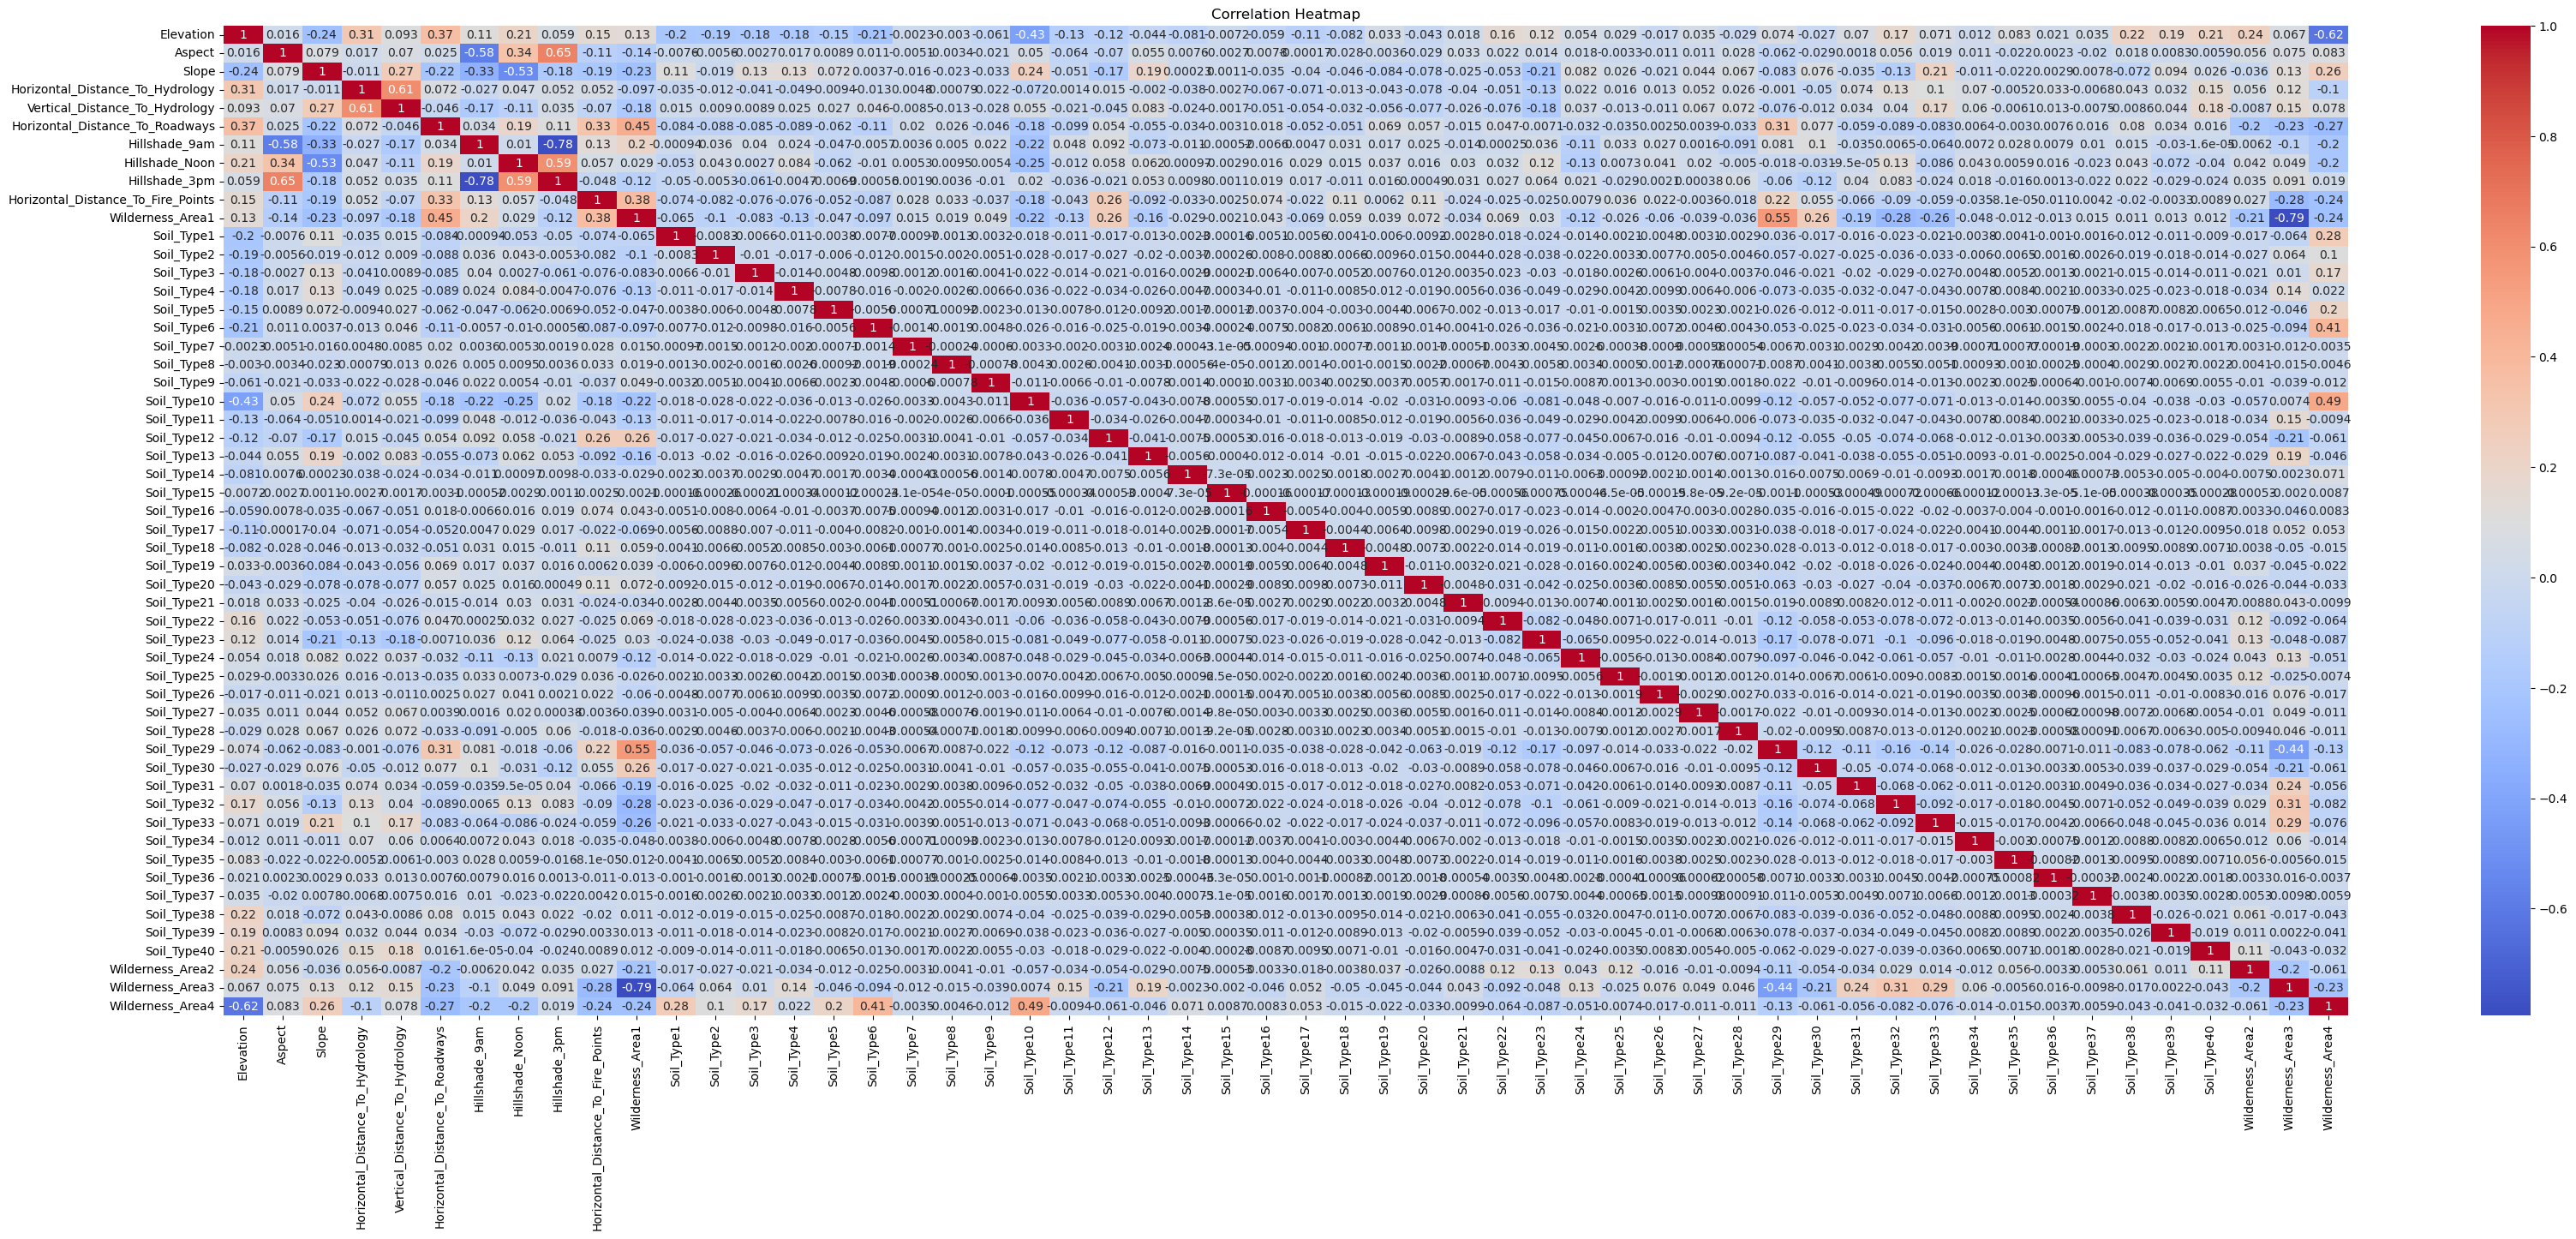

In [7]:
plt.figure(figsize=(40, 15))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.006181,-0.100565,-0.200282
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,0.042392,0.048646,-0.195733
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,0.027473,-0.277510,-0.236548


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

In [11]:
features_scaled

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.23285905,
        -0.87936402, -0.26067295],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.23285905,
        -0.87936402, -0.26067295],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.23285905,
        -0.87936402, -0.26067295],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.23285905,
         1.13718548, -0.26067295],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.23285905,
         1.13718548, -0.26067295],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.23285905,
         1.13718548, -0.26067295]])

# 3. Building and Evaluating a Multi-Class Classifier

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("5-Fold CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

5-Fold CV Accuracy: 95.05%


In [16]:
model.fit(X_train, y_train)

C:\Users\Advait\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
print("Test Set Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 95.51%

Confusion Matrix:
 [[40179  2265     2     0     8     5    98]
 [ 1260 54997    95     0    77    58    13]
 [    3    95  6878    19     7   119     0]
 [    0     0    64   447     0    15     0]
 [   35   388    18     0  1544    10     0]
 [    1   107   226    19     4  3132     0]
 [  173    29     0     0     0     0  3813]]

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.97      0.96      7121
           4       0.92      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [25]:
importances = model.feature_importances_

In [27]:
import pandas as pd
importance_df = pd.DataFrame({
    "Feature": X.columns,     
    "Importance": importances
})

In [28]:
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

In [29]:
top10_features = importance_df.head(10)

print("Top 10 Features Used by the RandomForestClassifier:")
print(top10_features)

Top 10 Features Used by the RandomForestClassifier:
                               Feature  Importance
0                            Elevation    0.237651
5      Horizontal_Distance_To_Roadways    0.118021
9   Horizontal_Distance_To_Fire_Points    0.110806
3     Horizontal_Distance_To_Hydrology    0.060929
4       Vertical_Distance_To_Hydrology    0.057722
1                               Aspect    0.047363
7                       Hillshade_Noon    0.042645
6                        Hillshade_9am    0.041093
8                        Hillshade_3pm    0.040920
53                    Wilderness_Area4    0.033260


## 4. Explaining Predictions with SHAP and LIME

### A. Using SHAP(SHapley Additive exPlanations)

In [69]:
top_features = [
    "Elevation",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Aspect",
    "Hillshade_Noon",
    "Hillshade_9am",
    "Hillshade_3pm",
    "Wilderness_Area4"
]

In [50]:
top_features

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Aspect',
 'Hillshade_Noon',
 'Hillshade_9am',
 'Hillshade_3pm',
 'Wilderness_Area4']

In [64]:
len(X_test[top_features])

116203

In [65]:
len(X_test_top)

116203

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_top)

### Exlaining predictions using SHAPY would require much higher computational power and time
###
### Hence, skipping this step

### B. Using LIME (Local Interpretable Model-Agnostic Explanations)

In [19]:
!pip install lime


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import lime
import lime.lime_tabular
import numpy as np

In [21]:
class_names = [str(c) for c in sorted(y_train.unique())] if hasattr(y_train, 'unique') else ['Class1', 'Class2', '...']

In [22]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.tolist(),
    class_names=class_names,
    mode='classification'
)

In [23]:
i = 1
exp = lime_explainer.explain_instance(X_test[i], model.predict_proba, num_features=50)

In [24]:
exp.show_in_notebook(show_table=True, show_all=True)